In [1]:
from matplotlib.collections import LineCollection
%matplotlib inline

import numpy as np 
import scipy.io
import sys,os
import matplotlib.pyplot as plt
# I should learn how to load libraries in a more elegant way

sys.path.append(r'C:\Users\ORI\Documents\IDC-non-sync\Thesis\PythonApplication1\OriKerasExtension')
import OriKerasExtension
import ThesisHelper
reload(OriKerasExtension)
reload(ThesisHelper)
from   ThesisHelper import LoadSingleSubjectPython, readCompleteMatFile, ExtractDataVer4
import P300Prediction
reload(P300Prediction)
from P300Prediction import accuracy_by_repetition, create_target_table


# [all_target, all_non_target] = LoadSingleSubjectPython(r'C:\Users\ORI\Documents\Thesis\dataset_all\RSVP_Color116msVPfat.mat')



# all_samples = np.vstack((all_target,all_non_target))


# '''
# Create the tagging column
# '''
# all_tags = np.vstack((np.ones((all_target.shape[0],1)), np.zeros((all_non_target.shape[0],1))))

Hello World4
Hello World4


Using gpu device 0: GeForce GT 740M (CNMeM is disabled)


In [2]:
from OriKerasExtension import DebugLSTM
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

'''
define the neural network model:
'''
model = Sequential()

number_of_time_stamps =20
number_of_out_channels = 10
number_of_in_channels = 55
length_of_time_axe_mask = 10

model.add(Convolution2D(nb_filter=10,                         
                        nb_col=number_of_out_channels,
                        nb_row=1,
                        input_shape=(1, number_of_time_stamps, number_of_in_channels),
                        border_mode='same',
                        init='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, number_of_in_channels)))
model.add(Convolution2D(nb_filter=number_of_out_channels, nb_row=6, nb_col=1, border_mode='same',init='glorot_normal'))
model.add(MaxPooling2D(pool_size=(20, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
# model.add(LSTM(input_dim=55, output_dim=20,return_sequences=False))
# # model.add(Dense(275))
# # model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

#save the original weight before start the learning

In [ ]:
original_weights = model.get_weights();

RSVP_Color116msVPgcd.mat
(21000L, 200L, 55L)
Train on 64800 samples, validate on 7200 samples
Epoch 1/80
64800/64800 [==============================] - 420s - loss: 0.3803 - acc: 0.5676 - val_loss: 0.9548 - val_acc: 0.5199
Epoch 00000: val_loss improved from inf to 0.95476, saving model to c:\temp\weights3.hdf5
Epoch 2/80
64800/64800 [==============================] - 417s - loss: 0.3760 - acc: 0.5670 - val_loss: 0.7082 - val_acc: 0.6299
Epoch 00001: val_loss improved from 0.95476 to 0.70824, saving model to c:\temp\weights3.hdf5
Epoch 3/80
64800/64800 [==============================] - 417s - loss: 0.3814 - acc: 0.5699 - val_loss: 0.6326 - val_acc: 0.6822
Epoch 00002: val_loss improved from 0.70824 to 0.63262, saving model to c:\temp\weights3.hdf5
Epoch 4/80
64800/64800 [==============================] - 417s - loss: 0.3678 - acc: 0.5853 - val_loss: 0.8037 - val_acc: 0.5829
Epoch 00003: val_loss did not improve
Epoch 5/80
64800/64800 [==============================] - 417s - loss: 0.3

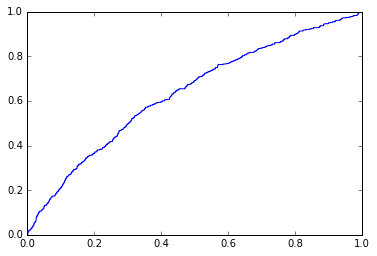

auc_score:0.633902043543
accuracy_by_repetition 0.369565217391


In [8]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

data_set_locations = [  "RSVP_Color116msVPicr.mat",
                        "RSVP_Color116msVPpia.mat",
                        "RSVP_Color116msVPfat.mat",
                        "RSVP_Color116msVPgcb.mat",
                        "RSVP_Color116msVPgcc.mat",
                        "RSVP_Color116msVPgcd.mat",
                        "RSVP_Color116msVPgcf.mat",
                        "RSVP_Color116msVPgcg.mat",
                        "RSVP_Color116msVPgch.mat",
                        "RSVP_Color116msVPiay.mat",
                        "RSVP_Color116msVPicn.mat"];

     


results = []
for subject_name in data_set_locations:
    subject_name = "RSVP_Color116msVPgcd.mat"
    print subject_name
    
    all_positive_train = []
    all_negative_train = []
    for files in ["RSVP_Color116msVPgcd.mat"]:
        gcd_res =  readCompleteMatFile(r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(files));



    
        data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'],  gcd_res['marker_positions'], gcd_res['target'], -200, 800)
        # print  data_for_eval
        temp_data_for_eval = np.zeros((data_for_eval[0].shape[0],200,data_for_eval[0].shape[2]))
        for new_i, i in enumerate(range(200)):
            temp_data_for_eval[:,new_i,:] = np.mean(data_for_eval[0][:,range(i,(i+1)),:],axis=1) 


        # train_data_gcd ,train_target_gcd= data_for_eval[0][gcd_res['train_mode'] == 1], data_for_eval[1][gcd_res['train_mode'] == 1]

        positive_train_data_gcd = temp_data_for_eval[np.all([gcd_res['train_mode'] == 1, gcd_res['target'] == 1], axis=0) ]
        negative_train_data_gcd = temp_data_for_eval[np.all([gcd_res['train_mode'] == 1, gcd_res['target'] == 0], axis=0) ]
        all_positive_train.append(positive_train_data_gcd)
        all_negative_train.append(negative_train_data_gcd)
    positive_train_data_gcd = np.vstack(all_positive_train)
    negative_train_data_gcd = np.vstack(all_negative_train)
    
    gcd_res =  readCompleteMatFile(r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(subject_name));
    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'],  gcd_res['marker_positions'], gcd_res['target'], -200, 800)
    # print  data_for_eval
    temp_data_for_eval = np.zeros((data_for_eval[0].shape[0],200,data_for_eval[0].shape[2]))

    for new_i, i in enumerate(range(200)):
        temp_data_for_eval[:,new_i,:] = np.mean(data_for_eval[0][:,range(i,(i+1)),:],axis=1) 




    from keras.utils.np_utils import to_categorical

    test_data_gcd ,test_target_gcd= temp_data_for_eval[gcd_res['train_mode'] != 1], data_for_eval[1][gcd_res['train_mode'] != 1]
    from keras.callbacks import ModelCheckpoint


    # negative_train_data_gcd = negative_train_data_gcd[:,:,:]
    
    all_data = np.vstack([positive_train_data_gcd, negative_train_data_gcd])





    all_tags = np.vstack([np.ones((positive_train_data_gcd.shape[0],1)), np.zeros((negative_train_data_gcd.shape[0],1))])
    temp = to_categorical(all_tags)



    # don't shuffle. instead group batches together

    shuffeled_samples, suffule_tags = shuffle(all_data,temp, random_state=0)

    print temp_data_for_eval.shape



#     model.set_weights(original_weights)

    from scipy import stats
    
    from sklearn.cross_validation import StratifiedShuffleSplit
    sss = list(StratifiedShuffleSplit(suffule_tags[:,0], n_iter=1, test_size=0.1, random_state=0))
    
    


    checkpointer = ModelCheckpoint(filepath=r"c:\temp\25_dec_cnn_with_ds.hdf5", verbose=1, save_best_only=True)
    model.fit(np.expand_dims(stats.zscore(shuffeled_samples[sss[0][0]], axis=1),axis=1), suffule_tags[sss[0][0]], 
              nb_epoch=80,show_accuracy=True,verbose=1, validation_data=(np.expand_dims(stats.zscore(shuffeled_samples[sss[0][1]], axis=1),axis=1), suffule_tags[sss[0][1]]), class_weight={0:1,1:100},
             callbacks=[checkpointer])

    test_prediction =  model.predict(np.expand_dims(stats.zscore(test_data_gcd, axis=1),axis=1), verbose=1)
    from sklearn.metrics import roc_curve, auc, roc_auc_score


    x, y, _ = roc_curve(test_target_gcd, test_prediction[:,1])



    # This is the ROC curve
    plt.plot(x,y)
    plt.show()
    auc_score = roc_auc_score(test_target_gcd, test_prediction[:,1])
    print "auc_score:{0}".format(auc_score)
    
    sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
    train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
    stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])
    
    _, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
    _, _, actual_data_for_sum= create_target_table(sub_gcd_res, test_prediction[:,1])
    
    print "accuracy_by_repetition {0}".format(accuracy_by_repetition(actual_data_for_sum, gt_data_for_sum, number_of_repetition=10))
    
    
    
    results.append(dict(subject_name=subject_name, test_prediction=test_prediction,auc_score=auc_score))
    break;

hi
13800/13800 [==============================] - 32s    


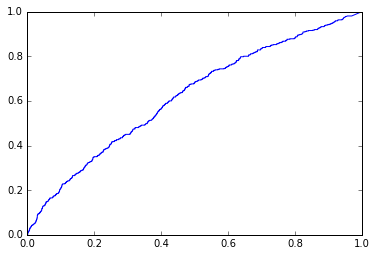

auc_score:0.618779251679
accuracy_by_repetition 0.260869565217


In [9]:
print "hi"
model.load_weights(r"c:\temp\weights3.hdf5")
test_prediction =  model.predict(np.expand_dims(stats.zscore(test_data_gcd, axis=1),axis=1), verbose=1)
from sklearn.metrics import roc_curve, auc, roc_auc_score


x, y, _ = roc_curve(test_target_gcd, test_prediction[:,1])



# This is the ROC curve
plt.plot(x,y)
plt.show()
auc_score = roc_auc_score(test_target_gcd, test_prediction[:,1])
print "auc_score:{0}".format(auc_score)

sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])

_, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
_, _, actual_data_for_sum= create_target_table(sub_gcd_res, test_prediction[:,1])

print "accuracy_by_repetition {0}".format(accuracy_by_repetition(actual_data_for_sum, gt_data_for_sum, number_of_repetition=10))



results.append(dict(subject_name=subject_name, test_prediction=test_prediction,auc_score=auc_score))

In [6]:
model.load_weights(r"c:\temp\weights3.hdf5")
test_prediction =  model.predict(stats.zscore(test_data_gcd, axis=1), verbose=1)
from sklearn.metrics import roc_curve, auc, roc_auc_score


x, y, _ = roc_curve(test_target_gcd, test_prediction[:,1])



# This is the ROC curve
plt.plot(x,y)
plt.show()
auc_score = roc_auc_score(test_target_gcd, test_prediction[:,1])
print "auc_score:{0}".format(auc_score)

sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])

_, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
_, _, actual_data_for_sum= create_target_table(sub_gcd_res, test_prediction[:,1])

print "accuracy_by_repetition {0}".format(accuracy_by_repetition(actual_data_for_sum, gt_data_for_sum, number_of_repetition=10))

TypeError: ('Bad input argument to theano function with name "C:\\Anaconda\\lib\\site-packages\\keras\\models.py:403"  at index 0(0-based)', 'Wrong number of dimensions: expected 4, got 3 with shape (128L, 200L, 55L).')

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(suffule_tags[:,0], n_iter=1, test_size=0.1, random_state=0)
print list(sss)[0][1].shape

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


x, y, _ = roc_curve(test_target_gcd, test_prediction[:,1])

    

# This is the ROC curve
plt.plot(x,y)
plt.show()
print roc_auc_score(test_target_gcd, test_prediction[:,1])

In [ ]:
import scipy.io as sio
bbci_results = sio.loadmat(r"C:\git\temp_lda_results.mat");


from sklearn.metrics import roc_curve, auc, roc_auc_score
x, y, _ = roc_curve(test_target_gcd, bbci_results['out'].flatten())
    

# This is the ROC curve
plt.plot(x,y)
plt.show()
print roc_auc_score(test_target_gcd, bbci_results['out'].flatten())


sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])

_, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
_, _, actual_data_for_sum= create_target_table(sub_gcd_res, test_prediction[:,1])

# _, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
# _, _, actual_data_for_sum= create_target_table(sub_gcd_res, bbci_results['out'].flatten())
print test_prediction.shape
print accuracy_by_repetition(actual_data_for_sum, gt_data_for_sum, number_of_repetition=10)

In [ ]:
sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])

_, _, gt_data_for_sum= create_target_table(sub_gcd_res, test_target_gcd)
_, _, actual_data_for_sum= create_target_table(sub_gcd_res, test_prediction)
print test_prediction.shape
print accuracy_by_repetition(actual_data_for_sum, gt_data_for_sum, number_of_repetition=10)

In [ ]:
import pandas as pd

# ['train_block', 'marker_positions', 'target', 'stimulus', 'train_mode', 'channels_names', 'train_trial', 'all_relevant_channels']
print 
all_results =  np.zeros(( len(gcd_res['train_block']),2 ))
# pd.DataFrame(a)
results_table = pd.DataFrame( all_results)
results_table.rename(columns={0: 'a', 1: 'b'}, inplace=True)
print results_table

# def evaluate_model(model, test_data, probabilities_vector):
#     """
#     tagging_vector: a vector a the labels
#     """
#     # get trial_vector
#     unique_trials = np.unique(test_data['train_trial'])
#     #<trial_id - number_of_trials>, <block id - number_of_trials>, <stimuli 0><stimuli 1>...<stimuli N>
    
    
    
    
# #     all_results = np.zeros((number_of_trials,number_of_stimulies+2))
# #     probability_results=[]
# #     for single_trial in unique_trials:
# #         probability_results.append(dict(trial_id=single_trial))
# #         stimuli_histogra
# #         probability_results[-1]
# #         for stimuli_id in unique_stimuli:
            
# #         # create probability histogram for each stimulies
        
        
    
# evaluate_model(None, gcd_res)

In [ ]:
gcd_res['train_trial']

In [ ]:
from sklearn import datasets, linear_model, cross_validation, grid_search
from keras.callbacks import ModelCheckpoint
number_of_channels = 55
from sklearn.metrics import roc_curve, auc, roc_auc_score

all_results = []
kf_total = cross_validation.KFold(shuffeled_samples.shape[0], n_folds=8, indices=True, shuffle=True, random_state=4)
for train, test in kf_total:
    #initalize the weiget to the pre-training ones
    
    data_traing_lstm = shuffeled_samples[train].reshape(shuffeled_samples[train].shape[0],number_of_channels,-1).transpose(0,2,1)
    print (shuffeled_samples[test].shape)
    train_tags = suffule_tags[train]

    data_testing_lstm = shuffeled_samples[test].reshape(shuffeled_samples[test].shape[0],number_of_channels,-1).transpose(0,2,1)
    test_tags = suffule_tags[test]
    
    
    model.set_weights(original_weights)
#     checkpointer = ModelCheckpoint(filepath=r"c:\temp\weights2.hdf5", verbose=1, save_best_only=True)
    model.fit(data_traing_lstm, train_tags, nb_epoch=3,show_accuracy=True,verbose=1, validation_split=0.1)
    test_prediction =  model.predict(data_testing_lstm)
    
    evaluation_results = model.evaluate(data_testing_lstm, test_tags, show_accuracy=True,verbose=1) 
    print (evaluation_results)
    all_results.append(evaluation_results) 
    x, y, _ = roc_curve(test_tags, test_prediction)
    

    # This is the ROC curve
    plt.plot(x,y)
    plt.show()
    print roc_auc_score(test_tags, test_prediction)
        
    break;
    


    
#     print train, '\n', test, '\n\n'

In [ ]:
print (np.mean( np.asarray(all_results)[:,1] ))
print (np.std( np.asarray(all_results)[:,1] ))